In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn;
%matplotlib inline
np.random.seed(42)

In [2]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [15]:
np.empty(3)

array([ 0.,  0.,  0.])

In [17]:
np.linspace(1,10,9)

array([  1.   ,   2.125,   3.25 ,   4.375,   5.5  ,   6.625,   7.75 ,
         8.875,  10.   ])

In [22]:
x1=np.random.randint(10,size=(3,4,5))
print('x\' ndim is {} \t shape is {}\t size is {}'.format(x1.ndim,x1.shape,x1.size)) 

x' ndim is 3 	 shape is (3, 4, 5)	 size is 60


In [24]:
x_sub=x1[:2,:3,:4]
x_sub

array([[[6, 3, 7, 4],
        [9, 2, 6, 7],
        [3, 7, 7, 2]],

       [[4, 0, 9, 5],
        [0, 9, 2, 6],
        [8, 2, 4, 2]]])

In [25]:
x1[np.newaxis,:]

array([[[[6, 3, 7, 4, 6],
         [9, 2, 6, 7, 4],
         [3, 7, 7, 2, 5],
         [4, 1, 7, 5, 1]],

        [[4, 0, 9, 5, 8],
         [0, 9, 2, 6, 3],
         [8, 2, 4, 2, 6],
         [4, 8, 6, 1, 3]],

        [[8, 1, 9, 8, 9],
         [4, 1, 3, 6, 7],
         [2, 0, 3, 1, 7],
         [3, 1, 5, 5, 9]]]])

In [27]:
np.vstack([np.ones((1,3)),np.random.randint(1,10,size=(2,3))])

array([[ 1.,  1.,  1.],
       [ 7.,  9.,  8.],
       [ 5.,  2.,  5.]])

In [43]:
np.hstack(
    [np.random.randn(2),
    np.random.randn(10)]).reshape(1,-1).shape

(1, 12)

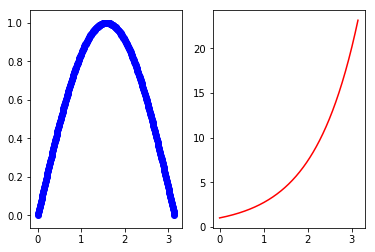

In [61]:
theta = np.linspace(0,np.pi,300)
# plt.figure()
plt.subplot(121)
plt.scatter(theta,np.sin(theta),c='b')
plt.subplot(122)
plt.plot(theta,np.exp(theta),'r-')
plt.show()

In [64]:
from functools import reduce
reduce(lambda x,y:x+y,np.random.randn(10))
np.sum(np.random.randn(10))

-2.2184356466945436

In [75]:
tall=np.random.randint(180,200,size=(1,100))
print(tall.mean(),tall.min(),tall.max(),tall.std())

189.23 180 199 6.136538112


Text(0,0.5,'number')

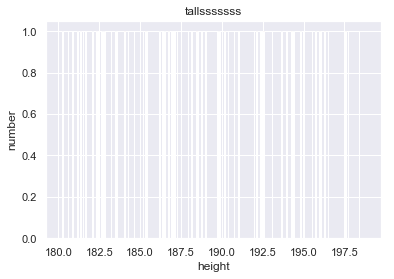

In [74]:
plt.hist(tall)
plt.title('tallsssssss')
plt.xlabel('height')
plt.ylabel('number')

![wwww]https://ws4.sinaimg.cn/large/0069RVTdgy1ftztrdfp54j30gw0hwdgt.jpg

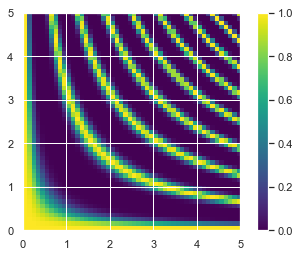

In [95]:
seaborn.set()
x=np.linspace(0,5,50)
y=np.linspace(0,5,50)[:,np.newaxis]
z=np.sin(x)**10+np.cos(10+y*x)*np.cos(x)
plt.imshow(np.cos(y*x)**10,origin='lower',extent=[0,5,0,5],cmap='viridis')
plt.colorbar()

In [96]:
np.sum(x>2.5)

25